In [14]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
os.chdir("/Users/andrewyoel/Documents")

In [73]:
df= pd.read_excel("data kedelai skripsi copy.xlsx")

In [74]:
df.head()

,diamater,jumlah buku,bobot 100 biji,jumlah biji,jumlah polong,PB,LB,TB,jumlah cabang,tinggi tanaman
0,4.55,11,25.4,64,24,11.488,7.382,4.926,9,62.000000
1,4.23,10,21.6,28,11,11.196,7.544,4.872,8,61.000000
2,5.73,11,27.7,99,41,12.216,7.238,5.054,7,52.766667
3,4.94,9,28.6,75,30,12.358,7.370,5.196,6,69.700000
4,4.50,9,26.9,35,15,11.972,7.410,5.140,7,52.250000


In [5]:
df.shape

(46, 10)

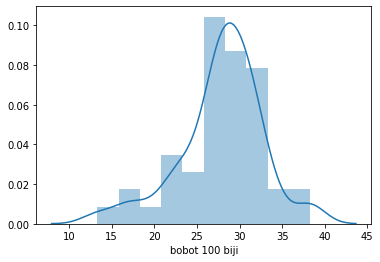

In [13]:
sns.distplot(df['bobot 100 biji'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
diamater          46 non-null float64
jumlah buku       46 non-null int64
bobot 100 biji    46 non-null float64
jumlah biji       46 non-null int64
jumlah polong     46 non-null int64
PB                46 non-null float64
LB                46 non-null float64
TB                46 non-null float64
jumlah cabang     46 non-null int64
tinggi tanaman    46 non-null float64
dtypes: float64(6), int64(4)
memory usage: 3.7 KB


In [21]:
numeric_feats = df.dtypes[df.dtypes != 'object'].index

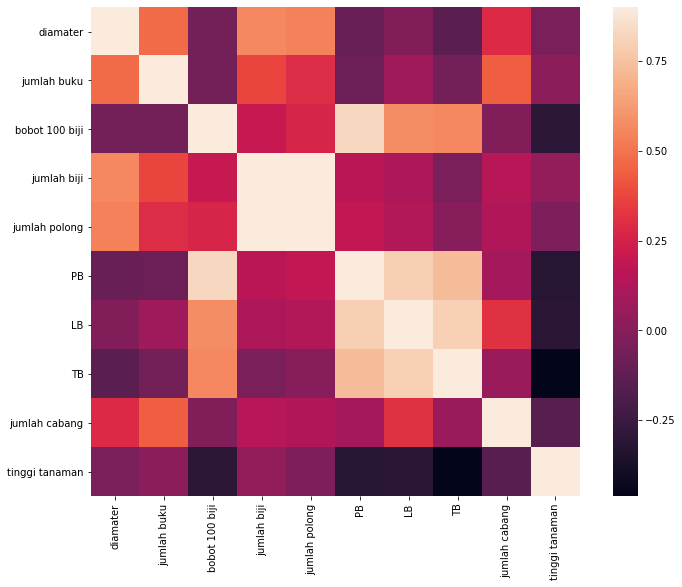

In [31]:
cormat=df[numeric_feats].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cormat,vmax= 0.9, square= True)

In [37]:
bobot_100_biji= pd.DataFrame({'bobot 100 biji' : df['bobot 100 biji'],'log bobot 100 biji': np.log1p(df['bobot 100 biji'])})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2da32b38>,
      dtype=object)

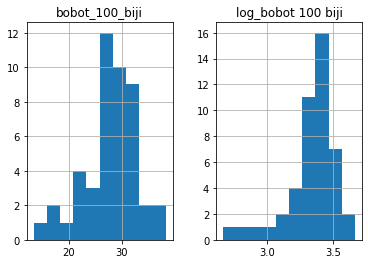

In [36]:
bobot_100_biji.hist()

In [77]:
df['bobot 100 biji']= np.log1p(df['bobot 100 biji'])

In [148]:
#split feature and target values
X= df.iloc[:, 5:8].values
y= df['bobot 100 biji']

In [149]:
from sklearn.linear_model import RidgeCV,LassoCV,LinearRegression
from sklearn.model_selection import cross_val_score

In [150]:
def rmse_cv(model): 
    return np.sqrt(-cross_val_score(model,X,y, scoring= "RMSE", cv =5))

In [151]:
# Model 1 = Linear Regression
model_lr = LinearRegression()
scores = cross_val_score(model_lr, X, y, cv=5)
scores
print(scores.mean())

0.4489531013049722


In [144]:
# Model 2 = Ridge Regression
model_Rs = RidgeCV(alphas =[1, 0.1, 0.05, 0.01])
scores1 = cross_val_score(model_Rs, X, y, cv=5)
scores1
print(scores1.mean())

0.4694775401476405


In [145]:
# Model 3 = Lasso Regression
model_Ls = LassoCV(alphas =[1, 0.1, 0.05, 0.01])
scores_lasso = cross_val_score(model_Rs, X, y, cv=5)
scores_lasso
print(scores_lasso.mean())

0.4694775401476405
